# Chapter 15: Quantum Lernmatrix

We introduce quantum Lernmatrix  based on the Monte Carlo Lernmatrix in which  
$n$ units  are stored in the quantum superposition of $\log_2 (n)$ units representing  $O\left(\frac{n^2}{ \log( n )^2}\right)$ binary sparse coded patterns.
During the retrieval phase quantum counting of ones based on Euler’s formula is used for the pattern recovery as proposed by Trugenberger.

## Quantum Counting Ones

In a binary string of the length $N$ we can represent the fraction of $k$ ones by the simple formula $k/N$ and of the zeros as  $(N-k)/N$ resulting in a linear relation.
We can interpret these numbers as probability values. We can map these linear relations into the sigmoid-like probability functions for  he presence of ones using Euler's formula \cite{Trugenberger2001} in relation to trigonometry
\begin{equation}
\left(\sin\left(\frac{\pi \cdot k}{2 \cdot N}\right) \right)^2 = \left|\frac{e^{i \cdot \frac{\pi \cdot k}{2 \cdot N}} - e^{-i \cdot \frac{\pi \cdot k}{2 \cdot N}}}{2}\right|^2 \in [0,1]
\end{equation}
and of zeros with
\begin{equation}
\left(\cos\left(\frac{\pi \cdot k}{2 \cdot N}\right) \right)^2= \left|\frac{e^{i \cdot \frac{\pi \cdot k}{2 \cdot N}} + e^{-i \cdot \frac{\pi \cdot k}{2 \cdot N}}}{2}\right|^2 \in [0,1]
\end{equation}

For the superposition part represented by the control 
qubit $0$  the phase $e^{i \cdot \frac{\pi }{2 \cdot 3}}$ is applied for each one. For the superposition part represented by the control 
qubit $1$  the phase $e^{-i \cdot \frac{\pi }{2 \cdot 3}}$ is applied for each one. 
\begin{equation}
\frac{1}{\sqrt{2}} \cdot | 0 \rangle  \otimes  \left( e^{i \cdot \frac{\pi }{2 \cdot 3} } \cdot | 1 \rangle \otimes  | 0 \rangle  \otimes e^{i \cdot \frac{\pi }{2 \cdot 3} } \cdot | 1 \rangle \right)  
+
\end{equation}

\begin{equation}
\frac{1}{\sqrt{2}}  \cdot  | 1 \rangle   \otimes  \left( e^{-i \cdot \frac{\pi }{2 \cdot 3} } \cdot | 1 \rangle \otimes  | 0 \rangle  \otimes e^{-i \cdot \frac{\pi }{2 \cdot 3} } \cdot | 1 \rangle \right) =
\end{equation}

\begin{equation}
\frac{e^{i \cdot \frac{\pi  \cdot 2}{2 \cdot 3} } }{\sqrt{2}}    | 0101 \rangle + \frac{e^{-i \cdot \frac{\pi  \cdot 2}{2 \cdot 3} } }{\sqrt{2}}    | 1101 \rangle 
\end{equation}

In [121]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit.library import MCXGate
from qiskit.visualization import plot_histogram
from math import pi

In [122]:
qc = QuantumCircuit(4)

#Input is |101>
qc.x(0)
qc.x(2)

qc.barrier()

qc.h(3)

qc.cp(-pi/6,0,3)
qc.cp(-pi/6,1,3)
qc.cp(-pi/6,2,3)

qc.x(3)

qc.cp(pi/6,0,3)
qc.cp(pi/6,1,3)
qc.cp(pi/6,2,3)

qc.x(3)

qc.h(3)

qc.draw(fold=160)

┌───┐ ░                                                                              
q_0: ┤ X ├─░───────■──────────────────────────────────■───────────────────────────────────
     └───┘ ░       │                                  │                                   
q_1: ──────░───────┼─────────■────────────────────────┼────────■──────────────────────────
     ┌───┐ ░       │         │                        │        │                          
q_2: ┤ X ├─░───────┼─────────┼─────────■──────────────┼────────┼────────■─────────────────
     └───┘ ░ ┌───┐ │P(-π/6)  │P(-π/6)  │P(-π/6) ┌───┐ │P(π/6)  │P(π/6)  │P(π/6) ┌───┐┌───┐
q_3: ──────░─┤ H ├─■─────────■─────────■────────┤ X ├─■────────■────────■───────┤ X ├┤ H ├
           ░ └───┘                              └───┘                           └───┘└───┘


Total count are: {'0101': 0.25, '1101': 0.75}


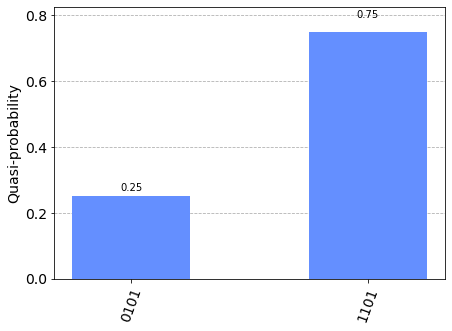

In [123]:
simulator = Aer.get_backend('statevector_simulator')

# Run and get counts
result=execute(qc,simulator).result()

counts = result.get_counts()

print("\nTotal count are:",counts)
plot_histogram(counts)

The probability of measuring the control qubit $|0 \rangle$ is
\begin{equation}
p(|0 \rangle) =  p(|0101 \rangle) = \left(\cos\left(\frac{\pi \cdot 2}{2 \cdot 3}\right) \right)^2=0.25
\end{equation}
and the  probability of measuring the control qubit $|1 \rangle$ is
\begin{equation}
 p(|1 \rangle) =   p(|1101 \rangle) = \left(\sin\left(\frac{\pi \cdot 2}{2 \cdot 3}\right) \right)^2=0.75
\end{equation}
indicating the presence of two ones

## Quantum Lernmatrix


To represent four $4$ units we need two index qubits in superposition. Each index state of the qubit is entangled with a pattern by the  Toffoli gate also called the ccX gate (CCNOT gate, controlled controlled not gate), by setting a corresponding qubit  to one.
In our example we store three patterns  $\textbf{x}_1=(1,0,0,1)$; $\textbf{y}_1=(1,0,0,1)$, $\textbf{x}_2=(1,0,0,0)$; $\textbf{y}_2=(0,1,0,0)$ and  $\textbf{x}_3=(0,0,1,0)$; $\textbf{y}_3=(0,0,1,0)$

The quantum circuit that produces the $sleep$ $phase$. The qubits $0$ to $3$ represent the query vector, the qubits $4$ to $7$ the associative memory, the qubits $8$ to $11$ represent the count and the qubits $12$ and $13$ are the index qubits, the qubit $14$ is the control qubit

In [124]:
qc = QuantumCircuit(15)

#0-3 query 

qc.x(0)
qc.x(3)

#4-7 data
#8-11 net
#Index Pointer
#12-13
#Aux
#14

#Index Pointer
qc.h(12)
qc.h(13)

qc.barrier()
#1st weights
qc.ccx(12,13,4)
qc.ccx(12,13,7)

qc.barrier()
#2th weights

qc.x(12)

qc.ccx(12,13,4)

qc.x(12)

qc.barrier()
#3th weights

qc.x(13)
qc.ccx(12,13,6)
qc.x(13)

qc.barrier()
#4th weights

qc.x(12)
qc.x(13)
qc.ccx(12,13,4)
qc.ccx(12,13,7)
qc.x(13)
qc.x(12)


qc.draw(fold=160)

┌───┐ ░            ░                 ░                 ░                     
 q_0: ┤ X ├─░────────────░─────────────────░─────────────────░─────────────────────
      └───┘ ░            ░                 ░                 ░                     
 q_1: ──────░────────────░─────────────────░─────────────────░─────────────────────
            ░            ░                 ░                 ░                     
 q_2: ──────░────────────░─────────────────░─────────────────░─────────────────────
      ┌───┐ ░            ░                 ░                 ░                     
 q_3: ┤ X ├─░────────────░─────────────────░─────────────────░─────────────────────
      └───┘ ░ ┌───┐      ░      ┌───┐      ░                 ░      ┌───┐          
 q_4: ──────░─┤ X ├──────░──────┤ X ├──────░─────────────────░──────┤ X ├──────────
            ░ └─┬─┘      ░      └─┬─┘      ░                 ░      └─┬─┘          
 q_5: ──────░───┼────────░────────┼────────░─────────────────░────────┼────────────
            ░   │        ░        │        ░      ┌───┐      ░        │            
 q_6: ──────░───┼────────░────────┼────────░──────┤ X ├──────░────────┼────────────
            ░   │  ┌───┐ ░        │        ░      └─┬─┘      ░        │  ┌───┐     
 q_7: ──────░───┼──┤ X ├─░────────┼────────░────────┼────────░────────┼──┤ X ├─────
            ░   │  └─┬─┘ ░        │        ░        │        ░        │  └─┬─┘     
 q_8: ──────░───┼────┼───░────────┼────────░────────┼────────░────────┼────┼───────
            ░   │    │   ░        │        ░        │        ░        │    │       
 q_9: ──────░───┼────┼───░────────┼────────░────────┼────────░────────┼────┼───────
            ░   │    │   ░        │        ░        │        ░        │    │       
q_10: ──────░───┼────┼───░────────┼────────░────────┼────────░────────┼────┼───────
            ░   │    │   ░        │        ░        │        ░        │    │       
q_11: ──────░───┼────┼───░────────┼────────░────────┼────────░────────┼────┼───────
      ┌───┐ ░   │    │   ░ ┌───┐  │  ┌───┐ ░        │        ░ ┌───┐  │    │  ┌───┐
q_12: ┤ H ├─░───■────■───░─┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■────■──┤ X ├
      ├───┤ ░   │    │   ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░ ├───┤  │    │  ├───┤
q_13: ┤ H ├─░───■────■───░────────■────────░─┤ X ├──■──┤ X ├─░─┤ X ├──■────■──┤ X ├
      └───┘ ░            ░                 ░ └───┘     └───┘ ░ └───┘          └───┘
q_14: ──────░────────────░─────────────────░─────────────────░─────────────────────
            ░            ░                 ░                 ░

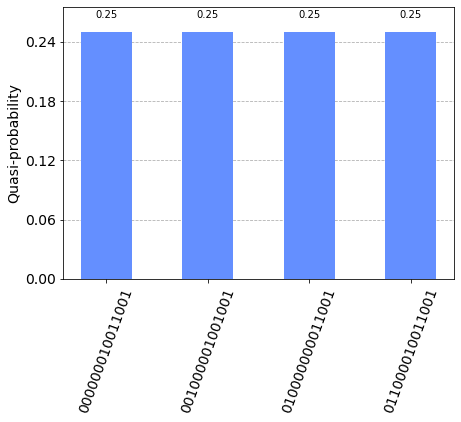

In [125]:
simulator = Aer.get_backend('statevector_simulator')
# Run and get counts
result=execute(qc,simulator).result()
counts = result.get_counts()
plot_histogram(counts)

Four superposition state corresponding to the four units of the associative memory. The qubits $0$ to $3$ represent the  query vector $\textbf{x}_q=(1,0,0,1)$, the qubits $4$ to $7$ the associative memory, the qubits $8$ to $11$ represent the count  and the qubits $12$ and $13$ are the index qubits, the control qubit $14$ is zero.  Note that the units are counted in the reverse order by the index qubits: $11$ first unit,  $10$ for the third unit,  $01$ for second unit and $00$ for the fourth unit.

The quantum circuit that produces the $sleeep$ and $active$  $phase4. The query and the amplification operations on the count qubits,  the qubits $8$ to $11$. The control qubit $14$.

 The architecture is described by fifteen qubits. The qubits $0$ to $3$ represent the query vector, the qubits $4$ to $7$ the associative memory, the qubits $8$ to $11$ represent the count  and the qubits $12$ and $13$ are the index qubits, the qubit $14$ is the control qubit. The count operation is   done by the ccX gate

In [126]:
qc = QuantumCircuit(15)

#0-3 query 

qc.x(0)
qc.x(3)

#4-7 data
#8-11 net
#Index Pointer
#12-13
#Aux
#14

#Index Pointer
qc.h(12)
qc.h(13)

qc.barrier()
#1st weights
qc.ccx(12,13,4)
qc.ccx(12,13,7)

qc.barrier()
#2th weights

qc.x(12)

qc.ccx(12,13,4)

qc.x(12)

qc.barrier()
#3th weights

qc.x(13)
qc.ccx(12,13,6)
qc.x(13)

qc.barrier()
#4th weights

qc.x(12)
qc.x(13)
qc.ccx(12,13,4)
qc.ccx(12,13,7)
qc.x(13)
qc.x(12)

qc.barrier()

#query
qc.ccx(0,4,8)
qc.ccx(1,5,9)
qc.ccx(2,6,10)
qc.ccx(3,7,11)

#Dividing
qc.h(14)
qc.barrier()
#Marking
qc.cp(-pi/4,8,14)
qc.cp(-pi/4,9,14)
qc.cp(-pi/4,10,14)
qc.cp(-pi/4,11,14)

qc.barrier()

qc.x(14)

qc.cp(pi/4,8,14)
qc.cp(pi/4,9,14)
qc.cp(pi/4,10,14)
qc.cp(pi/4,11,14)

qc.h(14)

qc.draw(fold=110)

┌───┐ ░            ░                 ░                 ░                      ░                      ░ »
 q_0: ┤ X ├─░────────────░─────────────────░─────────────────░──────────────────────░───■──────────────────░─»
      └───┘ ░            ░                 ░                 ░                      ░   │                  ░ »
 q_1: ──────░────────────░─────────────────░─────────────────░──────────────────────░───┼────■─────────────░─»
            ░            ░                 ░                 ░                      ░   │    │             ░ »
 q_2: ──────░────────────░─────────────────░─────────────────░──────────────────────░───┼────┼────■────────░─»
      ┌───┐ ░            ░                 ░                 ░                      ░   │    │    │        ░ »
 q_3: ┤ X ├─░────────────░─────────────────░─────────────────░──────────────────────░───┼────┼────┼────■───░─»
      └───┘ ░ ┌───┐      ░      ┌───┐      ░                 ░      ┌───┐           ░   │    │    │    │   ░ »
 q_4: ──────░─┤ X ├──────░──────┤ X ├──────░─────────────────░──────┤ X ├───────────░───■────┼────┼────┼───░─»
            ░ └─┬─┘      ░      └─┬─┘      ░                 ░      └─┬─┘           ░   │    │    │    │   ░ »
 q_5: ──────░───┼────────░────────┼────────░─────────────────░────────┼─────────────░───┼────■────┼────┼───░─»
            ░   │        ░        │        ░      ┌───┐      ░        │             ░   │    │    │    │   ░ »
 q_6: ──────░───┼────────░────────┼────────░──────┤ X ├──────░────────┼─────────────░───┼────┼────■────┼───░─»
            ░   │  ┌───┐ ░        │        ░      └─┬─┘      ░        │  ┌───┐      ░   │    │    │    │   ░ »
 q_7: ──────░───┼──┤ X ├─░────────┼────────░────────┼────────░────────┼──┤ X ├──────░───┼────┼────┼────■───░─»
            ░   │  └─┬─┘ ░        │        ░        │        ░        │  └─┬─┘      ░ ┌─┴─┐  │    │    │   ░ »
 q_8: ──────░───┼────┼───░────────┼────────░────────┼────────░────────┼────┼────────░─┤ X ├──┼────┼────┼───░─»
            ░   │    │   ░        │        ░        │        ░        │    │        ░ └───┘┌─┴─┐  │    │   ░ »
 q_9: ──────░───┼────┼───░────────┼────────░────────┼────────░────────┼────┼────────░──────┤ X ├──┼────┼───░─»
            ░   │    │   ░        │        ░        │        ░        │    │        ░      └───┘┌─┴─┐  │   ░ »
q_10: ──────░───┼────┼───░────────┼────────░────────┼────────░────────┼────┼────────░───────────┤ X ├──┼───░─»
            ░   │    │   ░        │        ░        │        ░        │    │        ░           └───┘┌─┴─┐ ░ »
q_11: ──────░───┼────┼───░────────┼────────░────────┼────────░────────┼────┼────────░────────────────┤ X ├─░─»
      ┌───┐ ░   │    │   ░ ┌───┐  │  ┌───┐ ░        │        ░ ┌───┐  │    │  ┌───┐ ░                └───┘ ░ »
q_12: ┤ H ├─░───■────■───░─┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■────■──┤ X ├─░──────────────────────░─»
      ├───┤ ░   │    │   ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░ ├───┤  │    │  ├───┤ ░                      ░ »
q_13: ┤ H ├─░───■────■───░────────■────────░─┤ X ├──■──┤ X ├─░─┤ X ├──■────■──┤ X ├─░──────────────────────░─»
      └───┘ ░            ░                 ░ └───┘     └───┘ ░ └───┘          └───┘ ░ ┌───┐                ░ »
q_14: ──────░────────────░─────────────────░─────────────────░──────────────────────░─┤ H ├────────────────░─»
            ░            ░                 ░                 ░                      ░ └───┘                ░ »
«                                               ░                                               
« q_0: ─────────────────────────────────────────░───────────────────────────────────────────────
«                                               ░                                               
« q_1: ─────────────────────────────────────────░───────────────────────────────────────────────
«                                               ░                                               
« q_2: ─────────────────────────────────────────░───────────────────────────────

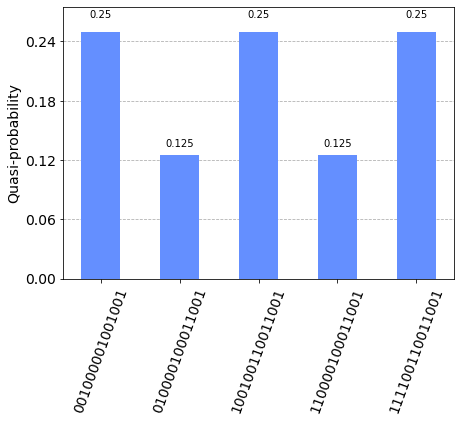

In [127]:
simulator = Aer.get_backend('statevector_simulator')
# Run and get counts
result=execute(qc,simulator).result()
counts = result.get_counts()
plot_histogram(counts)

With the query vector  $\textbf{x}_q=(1,0,0,1)$ units represented by the states have following values.

Five superposition states not equal to zero. 
 The control qubit $14$ equal to one indicates  the firing of the units. The measured value  is $0.625$. The two probabilities $0.25$ express the perfect match and the solution $(1,0,0,1)$, indicated by the index qubits $12$ and $13$, with the values $(11)$ for the first unit  and $(00)$ for the fourth unit. Note that the units are counted in the reverse order by the index qubits: $(11)$ first unit,  $(10)$ for the second unit,  $(01)$ for third unit and $(00)$ for the fourth unit. 
 The  control qubit $14$ equal to zero indicates the units that do not fire. The measured value is $0.375$. 
 The probability $0.25$ with the index  qubits $12$ and $13$, with the value $(01)$  for the third unit indicates the most dissimilar pattern $(0, 0, 1, 0)$. 

## Generalization: Example

In this example we store three patterns representing three associations:   $\textbf{x}_1=(1,1,0,0,0,0,1,0)$; $\textbf{y}_1=(1,1,0,0,0,0,1,0)$, $\textbf{x}_2=(0,1,0,1,1,0,0,0)$; $\textbf{y}_2=(0,1,0,1,1,0,0,0)$ and  $\textbf{x}_3=(0,0,1,0,0,1,0,1)$; $\textbf{y}_3=(0,0,1,0,0,1,0,1)$ with With  the query vector is $\textbf{x}_q=(1,1,0,0,0,0,0,0)$

In [128]:
qc = QuantumCircuit(28)

#0-7 query 
qc.x(0)
qc.x(1)

#qc.x(6)

#8-15 data
#16-23 net
#24-26 index
#Aux 27

#Pointer
qc.h(24)
qc.h(25)
qc.h(26)

qc.barrier()

gate = MCXGate(3)

#1st weights
qc.append(gate, [24, 25, 26, 8])
qc.append(gate, [24, 25, 26, 9])
qc.append(gate, [24, 25, 26, 14])

#2th weights
qc.x(24)
qc.append(gate, [24, 25, 26, 8])
qc.append(gate, [24, 25, 26, 9])
qc.append(gate, [24, 25, 26, 11])
qc.append(gate, [24, 25, 26, 12])
qc.append(gate, [24, 25, 26, 14])
qc.x(24)

#3th weights
qc.x(25)
qc.append(gate, [24, 25, 26, 10])
qc.append(gate, [24, 25, 26, 13])
qc.append(gate, [24, 25, 26, 15])
qc.x(25)

#4th weights
qc.x(24)
qc.x(25)
qc.append(gate, [24, 25, 26, 9])
qc.append(gate, [24, 25, 26, 11])
qc.append(gate, [24, 25, 26, 12])
qc.x(25)
qc.x(24)

#5th weights
qc.x(26)
qc.append(gate, [24, 25, 26, 9])
qc.append(gate, [24, 25, 26, 11])
qc.append(gate, [24, 25, 26, 12])
qc.x(26)

#6th weights
qc.x(26)
qc.x(24)
qc.append(gate, [24, 25, 26, 10])
qc.append(gate, [24, 25, 26, 13])
qc.append(gate, [24, 25, 26, 15])
qc.x(24)
qc.x(26)

#7th weights
qc.x(26)
qc.x(25)
qc.append(gate, [24, 25, 26, 8])
qc.append(gate, [24, 25, 26, 9])
qc.append(gate, [24, 25, 26, 14])
qc.x(25)
qc.x(26)

#8th weights
qc.x(26)
qc.x(25)
qc.x(24)
qc.append(gate, [24, 25, 26, 10])
qc.append(gate, [24, 25, 26, 13])
qc.append(gate, [24, 25, 26, 15])
qc.x(24)
qc.x(25)
qc.x(26)


qc.barrier()
#query
qc.ccx(0,8,16)
qc.ccx(1,9,17)
qc.ccx(2,10,18)
qc.ccx(3,11,19)
qc.ccx(4,12,20)
qc.ccx(5,13,21)
qc.ccx(6,14,22)
qc.ccx(7,15,23)


#Dividing
qc.barrier()
qc.h(27)



#Marking
qc.cp(-pi/4,16,27)
qc.cp(-pi/4,17,27)
qc.cp(-pi/4,18,27)
qc.cp(-pi/4,19,27)
qc.cp(-pi/4,20,27)
qc.cp(-pi/4,21,27)
qc.cp(-pi/4,22,27)
qc.cp(-pi/4,23,27)

qc.barrier()
qc.x(27)
qc.cp(pi/4,16,27)
qc.cp(pi/4,17,27)
qc.cp(pi/4,18,27)
qc.cp(pi/4,19,27)
qc.cp(pi/4,20,27)
qc.cp(pi/4,21,27)
qc.cp(pi/4,22,27)
qc.cp(pi/4,23,27)

qc.barrier()

qc.h(27)

qc.draw(fold=220)

┌───┐ ░                                                                                                                                                                                                ░           »
 q_0: ┤ X ├─░────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░───■───────»
      ├───┤ ░                                                                                                                                                                                                ░   │       »
 q_1: ┤ X ├─░────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░───┼────■──»
      └───┘ ░                                                                                                                                                                                                ░   │    │  »
 q_2: ──────░────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░───┼────┼──»
            ░                                                                                                                                                                                                ░   │    │  »
 q_3: ──────░────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░───┼────┼──»
            ░                                                                                                                                                                                                ░   │    │  »
 q_4: ──────░────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░───┼────┼──»
            ░                                                                                                                                                                                                ░   │    │  »
 q_5: ──────░────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░───┼────┼──»
            ░                                                                                                                                                                                                ░   │    │  »
 q_6: ──────░────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░───┼────┼──»
            ░                                                                                                                                                                                                ░   │    │  »
 q_7: ──────░────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░───┼────┼──»
            ░ ┌───┐               ┌───┐                                                                                                                        ┌───┐                                         ░   │    │  »
 q_8: ──────░─┤ X ├───────────────┤ X ├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤ X ├─────────────────────────────────────────░───■────┼──»
            ░ └─┬─┘┌───┐          └─┬─┘┌───┐                    

The quantum circuit that produces the $sleep$ $phase$. The qubits $0$ to $7$ represent the query vector, the qubits $8$ to $15$ the associative memory, the qubits $16$ to $23$ represent the count and the qubits $24$, $25$ and $26$ are the index qubits ($8$ states), the qubit $27$ is the control qubit. (b) The quantum circuit that produces the $active$  $phase$. The query and the amplification operations on the count qubits,  the qubits $16$ to $23$ and the control qubit $27$


Total count are: {'0000000000001010010000000011': 0.125, '0010000000001010010000000011': 0.125, '0011000000100001101000000011': 0.0625, '0100000000100001101000000011': 0.0625, '0101000000001010010000000011': 0.125, '1001000000110100001100000011': 0.125, '1011000000100001101000000011': 0.0625, '1100000000100001101000000011': 0.0625, '1110000000110101101100000011': 0.125, '1111000000110100001100000011': 0.125}


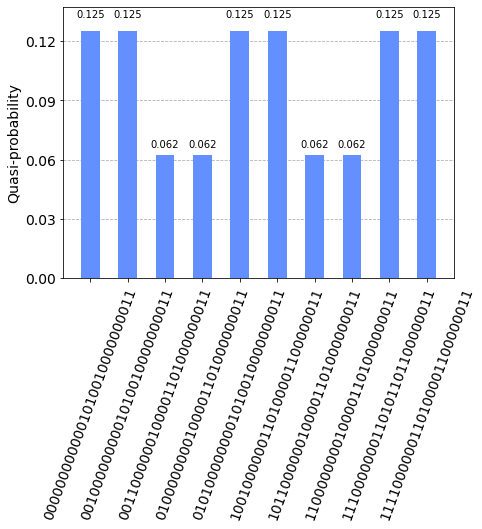

In [129]:
simulator = Aer.get_backend('statevector_simulator')

# Run and get counts
result=execute(qc,simulator).result()

counts = result.get_counts()

print("\nTotal count are:",counts)
plot_histogram(counts)

Teen superposition states not equal to zero.  The qubits $24$, $25$ and $26$ are the index qubits. Note that the units are counted in the reverse order by the index qubits: $111$ first unit,  $110$ for the second unit, till $000$ being the eight unit. The measured value for the control qubit $27$ equal to one indicates the firing of the units. The measured value is just $0.5$. This happens since the weight matrix is relatively small and not homogenous filled.
 For the query vector $\textbf{x}_q=(1,1,0,0,0,0,0,0)$ the three values $0.125$ indicate the  answer vector $(1,1,0,0,0,0,1,0)$ by the index qubits $24$, $25$ and $26$; for the first unit with the value ($111$), the second unit ($110$) and seventh unit ($001$). The control qubit $27$ equal to zero  indicates the units that do not fire. 

## Applying Trugenberger Amplification Several Times

According to Trugenberger   applying control qubit sequential, $b$ times results in  
\begin{equation}
\sum_{v=0}^b  \left( \sum_{j=1}^n \frac{1}{\sqrt{ n}} \cdot \left(\cos \left({\frac{\pi  \cdot count_j}{2 \cdot N} } \right) \right)^{b-v}   \cdot \left( i \cdot \sin \left( {\frac{\pi  \cdot count_j}{2 \cdot N} } \right) \right)^v  \cdot \right.
\end{equation}

\begin{equation}
 \cdot  |v \rangle |index_j   \rangle |  count_j  \rangle |  unit_j    \rangle   \bigg) \otimes |query \rangle. 
\end{equation}
with   $|v \rangle$ being the binary representation of the decimal value $v$.
The idea is then to measure $b$ control qubits $b$  times, until the desired state is obtained.

We apply the control qubit was applied  two times


In [130]:
qc = QuantumCircuit(16)

#0-3 query 

qc.x(0)

qc.x(3)

#4-7 data

#8-11 net

#Index
#12-13
#Aux


#Pointer
qc.h(12)
qc.h(13)

qc.barrier()
#1st weights
qc.ccx(12,13,4)
qc.ccx(12,13,7)

qc.barrier()
#2th weights

qc.x(12)

qc.ccx(12,13,4)

qc.x(12)

qc.barrier()
#3th weights

qc.x(13)
qc.ccx(12,13,6)
qc.x(13)

qc.barrier()
#4th weights

qc.x(12)
qc.x(13)
qc.ccx(12,13,4)
qc.ccx(12,13,7)
qc.x(13)
qc.x(12)

qc.barrier()
#query
qc.ccx(0,4,8)
qc.ccx(1,5,9)
qc.ccx(2,6,10)
qc.ccx(3,7,11)

#Dividing


qc.h(14)
#Marking
qc.cp(-pi/4,8,14)
qc.cp(-pi/4,9,14)
qc.cp(-pi/4,10,14)
qc.cp(-pi/4,11,14)

qc.barrier()

qc.x(14)
qc.cp(pi/4,8,14)
qc.cp(pi/4,9,14)
qc.cp(pi/4,10,14)
qc.cp(pi/4,11,14)
qc.h(14)

qc.barrier()
qc.h(15)
#Marking
qc.cp(-pi/4,8,15)
qc.cp(-pi/4,9,15)
qc.cp(-pi/4,10,15)
qc.cp(-pi/4,11,15)

qc.barrier()

qc.x(15)
qc.cp(pi/4,8,15)
qc.cp(pi/4,9,15)
qc.cp(pi/4,10,15)
qc.cp(pi/4,11,15)
qc.h(15)

qc.draw()

┌───┐ ░            ░                 ░                 ░                »
 q_0: ┤ X ├─░────────────░─────────────────░─────────────────░────────────────»
      └───┘ ░            ░                 ░                 ░                »
 q_1: ──────░────────────░─────────────────░─────────────────░────────────────»
            ░            ░                 ░                 ░                »
 q_2: ──────░────────────░─────────────────░─────────────────░────────────────»
      ┌───┐ ░            ░                 ░                 ░                »
 q_3: ┤ X ├─░────────────░─────────────────░─────────────────░────────────────»
      └───┘ ░ ┌───┐      ░      ┌───┐      ░                 ░      ┌───┐     »
 q_4: ──────░─┤ X ├──────░──────┤ X ├──────░─────────────────░──────┤ X ├─────»
            ░ └─┬─┘      ░      └─┬─┘      ░                 ░      └─┬─┘     »
 q_5: ──────░───┼────────░────────┼────────░─────────────────░────────┼───────»
            ░   │        ░        │        ░      ┌───┐      ░        │       »
 q_6: ──────░───┼────────░────────┼────────░──────┤ X ├──────░────────┼───────»
            ░   │  ┌───┐ ░        │        ░      └─┬─┘      ░        │  ┌───┐»
 q_7: ──────░───┼──┤ X ├─░────────┼────────░────────┼────────░────────┼──┤ X ├»
            ░   │  └─┬─┘ ░        │        ░        │        ░        │  └─┬─┘»
 q_8: ──────░───┼────┼───░────────┼────────░────────┼────────░────────┼────┼──»
            ░   │    │   ░        │        ░        │        ░        │    │  »
 q_9: ──────░───┼────┼───░────────┼────────░────────┼────────░────────┼────┼──»
            ░   │    │   ░        │        ░        │        ░        │    │  »
q_10: ──────░───┼────┼───░────────┼────────░────────┼────────░────────┼────┼──»
            ░   │    │   ░        │        ░        │        ░        │    │  »
q_11: ──────░───┼────┼───░────────┼────────░────────┼────────░────────┼────┼──»
      ┌───┐ ░   │    │   ░ ┌───┐  │  ┌───┐ ░        │        ░ ┌───┐  │    │  »
q_12: ┤ H ├─░───■────■───░─┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■────■──»
      ├───┤ ░   │    │   ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░ ├───┤  │    │  »
q_13: ┤ H ├─░───■────■───░────────■────────░─┤ X ├──■──┤ X ├─░─┤ X ├──■────■──»
      └───┘ ░            ░                 ░ └───┘     └───┘ ░ └───┘          »
q_14: ──────░────────────░─────────────────░─────────────────░────────────────»
            ░            ░                 ░                 ░                »
q_15: ──────░────────────░─────────────────░─────────────────░────────────────»
            ░            ░                 ░                 ░                »
«            ░                                                              ░ »
« q_0: ──────░───■──────────────────────────────────────────────────────────░─»
«            ░   │                                                          ░ »
« q_1: ──────░───┼────■─────────────────────────────────────────────────────░─»
«            ░   │    │                                                     ░ »
« q_2: ──────░───┼────┼────■────────────────────────────────────────────────░─»
«            ░   │    │    │                                                ░ »
« q_3: ──────░───┼────┼────┼────■───────────────────────────────────────────░─»
«            ░   │    │    │    │                                           ░ »
« q_4: ──────░───■────┼────┼────┼───────────────────────────────────────────░─»
«            ░   │    │    │    │                                           ░ »
« q_5: ──────░───┼────■────┼────┼───────────────────────────────────────────░─»
«            ░   │    │    │    │                                           ░ »
« q_6: ──────░───┼────┼────■────┼───────────────────────────────────────────░─»
«            ░   │    │    │    │                                           ░ »
« q_7: ──────░───┼────┼────┼────■───────────────────────────────────────────░─»
«            ░ ┌─┴─┐  │    │    │                                           ░ »
« q_8:


Total count are: {'0001000001001001': 0.25, '0010000100011001': 0.0625, '0110000100011001': 0.0625, '1010000100011001': 0.0625, '1100100110011001': 0.25, '1110000100011001': 0.0625, '1111100110011001': 0.25}


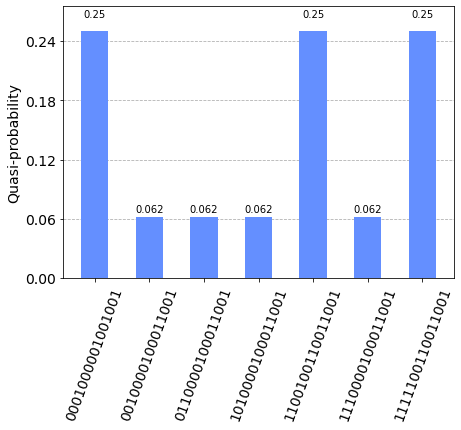

In [131]:
simulator = Aer.get_backend('statevector_simulator')

# Run and get counts
result=execute(qc,simulator).result()

counts = result.get_counts()

print("\nTotal count are:",counts)
plot_histogram(counts)

Seven superposition states not equal to zero. This is because the  states with the former values $0.125$ were divided into two values $0.125/2=0.0625$ by the two control qubits.
 The first control qubit $15$ equal to one indicates  the firing of the units.  The measured value is $0.625$. After measuring the first control qubit equal to one, the measured value of the second  control qubit $14$  equal to one  is $0.9$. Assuming  independence, the value of measuring the two control qubits with  the value one is  $0.5625=0.625 \cdot 0.9$.
 As before the  two values $0.25$ indicate the perfect match and the solution $(1,0,0,1)$ with the values  of the index qubits $12$ and $13$:  $(11)$ for the first unit  and $(00)$ for the fourth unit. 

## Tree-like Structures

We want to increase the probability of measuring the correct units representing the ones in the answer vector and decrease the probability of measuring the zeros. For example, in a sparse code with $k$ ones, $k$ measurements of different ones reconstruct the binary answer vector and we cannot use the idea of  applying Trugenberger amplification several times as indicated before. Instead we can increase the probability of measuring a one by the introduced tree-like structure \cite{Sacramento11}.
 The tree-like hierarchical associative memory approach is based on  aggregation neighboring units \cite{Sacramento11}.
The aggregation is  a Boolean OR based transform for  two or three neighboring weights of units results resulting in a more dense memory

In [132]:
qc = QuantumCircuit(23)

#0-3 query 
qc.x(0)
qc.x(3)

#4-7 data agregated
#8-11 data
#12-19 net/count
#Index Pointer
#20-21
#Aux
#22

#Index Pointer
qc.h(20)
qc.h(21)

#1st weights
#OR Aggregated
qc.barrier()
qc.ccx(20,21,4)
qc.ccx(20,21,7)
#Original
qc.barrier()
qc.ccx(20,21,8)
qc.ccx(20,21,11)

#2th weights
qc.x(20)
#OR Aggregated
qc.barrier()
qc.ccx(20,21,4)
qc.ccx(20,21,7)
#Original
qc.barrier()
qc.ccx(20,21,8)
qc.x(20)

#3th weights
qc.x(21)
#OR Aggregated
qc.barrier()
qc.ccx(20,21,4)
qc.ccx(20,21,6)
qc.ccx(20,21,7)
#Original
qc.barrier()
qc.ccx(20,21,10)
qc.x(21)

#4th weights
qc.x(20)
qc.x(21)
#OR Aggregated
qc.barrier()
qc.ccx(20,21,4)
qc.ccx(20,21,6)
qc.ccx(20,21,7)
#Original
qc.barrier()
qc.ccx(20,21,8)
qc.ccx(20,21,11)
qc.x(21)
qc.x(20)

qc.barrier()
#query, counting
#OR Aggregated
qc.ccx(0,4,12)
qc.ccx(1,5,13)
qc.ccx(2,6,14)
qc.ccx(3,7,15)
#Original
qc.ccx(0,8,16)
qc.ccx(1,9,17)
qc.ccx(2,10,18)
qc.ccx(3,11,19)

#Dividing
qc.barrier()
qc.h(22)

#Marking
qc.barrier()
qc.cp(-pi/8,12,22)
qc.cp(-pi/8,13,22)
qc.cp(-pi/8,14,22)
qc.cp(-pi/8,15,22)
qc.cp(-pi/8,16,22)
qc.cp(-pi/8,17,22)
qc.cp(-pi/8,18,22)
qc.cp(-pi/8,19,22)
qc.barrier()
qc.x(22)
qc.cp(pi/8,12,22)
qc.cp(pi/8,13,22)
qc.cp(pi/8,14,22)
qc.cp(pi/8,15,22)
qc.cp(pi/8,16,22)
qc.cp(pi/8,17,22)
qc.cp(pi/8,18,22)
qc.cp(pi/8,19,22)
qc.barrier()
qc.h(22)
qc.draw()

┌───┐ ░            ░                 ░            ░            ░      »
 q_0: ┤ X ├─░────────────░─────────────────░────────────░────────────░──────»
      └───┘ ░            ░                 ░            ░            ░      »
 q_1: ──────░────────────░─────────────────░────────────░────────────░──────»
            ░            ░                 ░            ░            ░      »
 q_2: ──────░────────────░─────────────────░────────────░────────────░──────»
      ┌───┐ ░            ░                 ░            ░            ░      »
 q_3: ┤ X ├─░────────────░─────────────────░────────────░────────────░──────»
      └───┘ ░ ┌───┐      ░                 ░ ┌───┐      ░            ░ ┌───┐»
 q_4: ──────░─┤ X ├──────░─────────────────░─┤ X ├──────░────────────░─┤ X ├»
            ░ └─┬─┘      ░                 ░ └─┬─┘      ░            ░ └─┬─┘»
 q_5: ──────░───┼────────░─────────────────░───┼────────░────────────░───┼──»
            ░   │        ░                 ░   │        ░            ░   │  »
 q_6: ──────░───┼────────░─────────────────░───┼────────░────────────░───┼──»
            ░   │  ┌───┐ ░                 ░   │  ┌───┐ ░            ░   │  »
 q_7: ──────░───┼──┤ X ├─░─────────────────░───┼──┤ X ├─░────────────░───┼──»
            ░   │  └─┬─┘ ░ ┌───┐           ░   │  └─┬─┘ ░ ┌───┐      ░   │  »
 q_8: ──────░───┼────┼───░─┤ X ├───────────░───┼────┼───░─┤ X ├──────░───┼──»
            ░   │    │   ░ └─┬─┘           ░   │    │   ░ └─┬─┘      ░   │  »
 q_9: ──────░───┼────┼───░───┼─────────────░───┼────┼───░───┼────────░───┼──»
            ░   │    │   ░   │             ░   │    │   ░   │        ░   │  »
q_10: ──────░───┼────┼───░───┼─────────────░───┼────┼───░───┼────────░───┼──»
            ░   │    │   ░   │  ┌───┐      ░   │    │   ░   │        ░   │  »
q_11: ──────░───┼────┼───░───┼──┤ X ├──────░───┼────┼───░───┼────────░───┼──»
            ░   │    │   ░   │  └─┬─┘      ░   │    │   ░   │        ░   │  »
q_12: ──────░───┼────┼───░───┼────┼────────░───┼────┼───░───┼────────░───┼──»
            ░   │    │   ░   │    │        ░   │    │   ░   │        ░   │  »
q_13: ──────░───┼────┼───░───┼────┼────────░───┼────┼───░───┼────────░───┼──»
            ░   │    │   ░   │    │        ░   │    │   ░   │        ░   │  »
q_14: ──────░───┼────┼───░───┼────┼────────░───┼────┼───░───┼────────░───┼──»
            ░   │    │   ░   │    │        ░   │    │   ░   │        ░   │  »
q_15: ──────░───┼────┼───░───┼────┼────────░───┼────┼───░───┼────────░───┼──»
            ░   │    │   ░   │    │        ░   │    │   ░   │        ░   │  »
q_16: ──────░───┼────┼───░───┼────┼────────░───┼────┼───░───┼────────░───┼──»
            ░   │    │   ░   │    │        ░   │    │   ░   │        ░   │  »
q_17: ──────░───┼────┼───░───┼────┼────────░───┼────┼───░───┼────────░───┼──»
            ░   │    │   ░   │    │        ░   │    │   ░   │        ░   │  »
q_18: ──────░───┼────┼───░───┼────┼────────░───┼────┼───░───┼────────░───┼──»
            ░   │    │   ░   │    │        ░   │    │   ░   │        ░   │  »
q_19: ──────░───┼────┼───░───┼────┼────────░───┼────┼───░───┼────────░───┼──»
      ┌───┐ ░   │    │   ░   │    │  ┌───┐ ░   │    │   ░   │  ┌───┐ ░   │  »
q_20: ┤ H ├─░───■────■───░───■────■──┤ X ├─░───■────■───░───■──┤ X ├─░───■──»
      ├───┤ ░   │    │   ░   │    │  └───┘ ░   │    │   ░   │  ├───┤ ░   │  »
q_21: ┤ H ├─░───■────■───░───■────■────────░───■────■───░───■──┤ X ├─░───■──»
      └───┘ ░            ░                 ░            ░      └───┘ ░      »
q_22: ──────░────────────░─────────────────░────────────░────────────░──────»
            ░            ░                 ░            ░            ░      »
«                 ░                 ░                 ░                 ░      »
« q_0: ───────────░─────────────────░─────────────────░─────────────────░───■──»
«                 ░                 ░                 ░                 ░   │  »
« q_1: ───────────░─────────────────░─────────────────░─────────────────░───┼──»
«               


Total count are: {'00100001001010011011001': 0.125, '01000011001000110011001': 0.036611652351682, '10010011001100111011001': 0.25, '10100001001010011011001': 0.125, '11000011001000110011001': 0.213388347648318, '11110011001100110011001': 0.25}


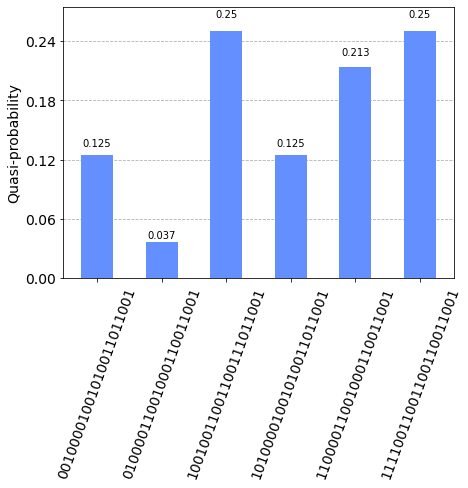

In [133]:
simulator = Aer.get_backend('statevector_simulator')

# Run and get counts
result=execute(qc,simulator).result()

counts = result.get_counts()

print("\nTotal count are:",counts)
plot_histogram(counts)

Five superposition states not equal to zero. The measured probability (control qubit equal to one)  indicates  the firing of the units is $0.838$, the measured probability values are $0.213$, $0.125$ and $0.25$.}